## Weekly activity

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

if not cv.useOptimized():
    cv.useOptimized(True)

cv.useOptimized()

True

1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.

Text(0.5, 1.0, 'grayscale_image')

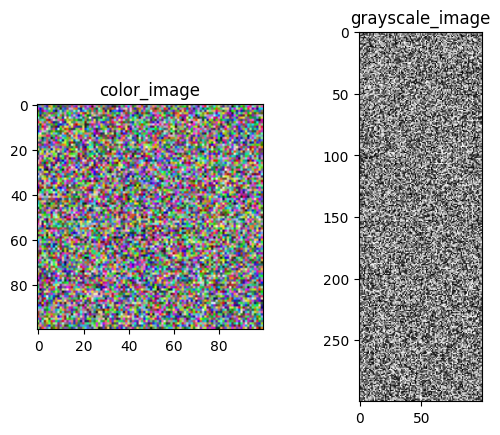

In [3]:
rand_noise = np.random.default_rng(88)

color_arr = rand_noise.integers(0, high=256, size=(100, 100, 3), dtype="uint8")
grayscale_arr = rand_noise.integers(0, high=256, size=(300, 100), dtype="uint8")

plt.subplot(1, 2, 1)
plt.imshow(color_arr)
plt.title("color_image")

plt.subplot(1, 2, 2)
plt.imshow(grayscale_arr, cmap="gray", vmin=0, vmax=255)
plt.title("grayscale_image")

# num of pixel = 100*100*3=30000 & 300*100=30000

2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```

In [4]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):

    img_copy = img.copy()
    
    height, width = img.shape[:2]
    
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):
        
            y1 = y + M
            x1 = x + N
        
            if x1>=width and y1>=height:
                x1 = width-1
                y1 = height-1
                tile = img[y:height, x:width]
                cv.rectangle(img_copy, (x,y), (x1, y1), line_color, 1)
                cv.imshow('tile', tile)
            
            elif y1>=height:
                y1 = height-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
            
            elif x1>=width:
                x1 = width-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
            
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

    return img_copy

In [61]:
img = cv.imread('images/dog.jfif')

num_horizontal_grid = 3
num_vertical_grid = 2
line_color = (0, 255, 0)

grid_image = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

cv.imshow('Patched_Image', grid_image)
cv.waitKey(0)
cv.destroyAllWindows()

3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

In [3]:
# method 1: hsv

from utils import display_images
img = cv.imread("images/dog.jfif")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
v_new = np.zeros_like(v) + 100
v_new = np.uint8(v_new)

transform = cv.merge((h, s, v_new))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "changed"))

ModuleNotFoundError: No module named 'utils'

In [5]:
# Method 2:
def point_op(img, a, b):

    img = img.astype(np.float32)
    res = a * img + b

    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [25]:
img = cv.imread('images/dog.jfif')
transform = point_op(img, 2, 100)

display_images([img, transform], ("original", "transform"))

4. Provide at least one common use case(s) for the following color spaces:
    - RGB
    - HSV
    - CIELAB

- RGB: Digital Displays
- HSV: Color selection tool
- CIELAB: color matching in printing